Initial MSE Loss: 0.03750000149011612
Initial CCE Loss: 0.19763490557670593


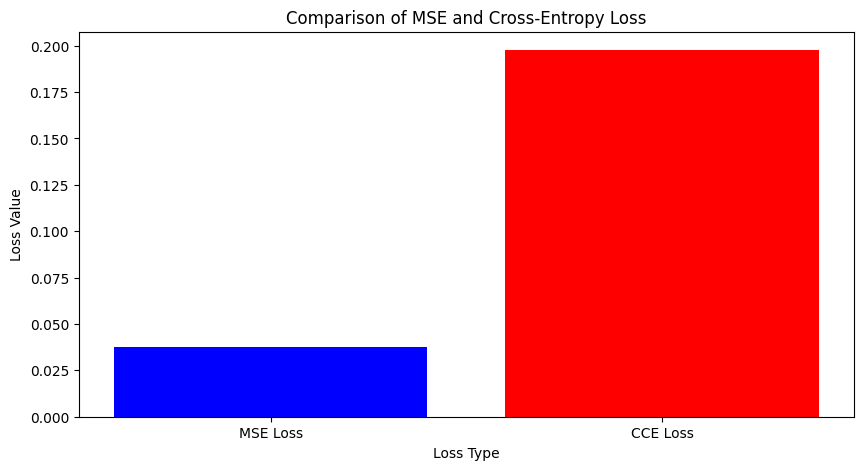

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define true values (y_true) and model predictions (y_pred)
y_true = tf.constant([1.0, 0.0, 1.0, 1.0])  # True labels
y_pred = tf.constant([0.9, 0.1, 0.8, 0.7])  # Model predictions

# Step 2: Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse_loss_fn = tf.keras.losses.MeanSquaredError()
cce_loss_fn = tf.keras.losses.CategoricalCrossentropy()

mse_loss = mse_loss_fn(y_true, y_pred).numpy()
cce_loss = cce_loss_fn(tf.one_hot(tf.cast(y_true, tf.int32), depth=2),
                        tf.stack([1 - y_pred, y_pred], axis=1)).numpy()

print(f"Initial MSE Loss: {mse_loss}")
print(f"Initial CCE Loss: {cce_loss}")

# Step 3: Modify predictions slightly and compute new loss values
perturbations = np.linspace(-0.2, 0.2, 10)
mse_losses = []
cce_losses = []

for perturb in perturbations:
    new_y_pred = y_pred + perturb
    new_mse = mse_loss_fn(y_true, new_y_pred).numpy()
    new_cce = cce_loss_fn(tf.one_hot(tf.cast(y_true, tf.int32), depth=2),
                           tf.stack([1 - new_y_pred, new_y_pred], axis=1)).numpy()
    mse_losses.append(new_mse)
    cce_losses.append(new_cce)

# Step 4: Plot loss function values
plt.figure(figsize=(10, 5))
plt.bar(["MSE Loss", "CCE Loss"], [mse_loss, cce_loss], color=['blue', 'red'])
plt.xlabel("Loss Type")
plt.ylabel("Loss Value")
plt.title("Comparison of MSE and Cross-Entropy Loss")
plt.show()
